<a href="https://colab.research.google.com/github/MathMachado/DSWP/blob/master/Notebooks/NB10_99__3DP_5_Feature%20Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Melhorias da sessão**

___
# **Referências**

___
# **Agenda**

___
# **3DP_FEATURE SELECTION**

![FeatureSelection](https://github.com/MathMachado/Python_RFB/blob/master/Material/FeatureSelection.png?raw=true)

[Fonte](https://medium.com/@sundarstyles89/weight-of-evidence-and-information-value-using-python-6f05072e83eb)

## Introdução à Feature Selection
* Selecionar colunas altamente relevantes para Machine Learnig;
* Melhorar a acurácia;
* Melhora a performance diante de grandes volumes de dados;
* Abaixo, vamos abordar os métodos de seleção univariados de features;
* Também, vamos discutir alguns métodos de eliminação de featurs;

In [1]:
!pip install bamboolib

  Created wheel for bamboolib: filename=bamboolib-0.0.0-cp36-none-any.whl size=1251 sha256=332b458a3b70c12f3816309303a0c66c8134ffcbe2a86979ad0edcb6f5aa1c76
  Stored in directory: /root/.cache/pip/wheels/3a/d4/20/5f7ee98e67d8820e1a0b61d119c9a1858b874eda9ab3cc3128
Successfully built bamboolib


In [0]:
from sklearn import feature_selection
import pandas as pd
import numpy as np
import seaborn as sns
import bamboolib
import matplotlib.pyplot as plt
%matplotlib inline

## VarianceThreshold
* Drop variáveis/features cuja variância seja inferior a um determinado threshold;
* Este é um método não-supervisionado, isto é, a variável rotulada (variável-resposta ou variável target) não entra e ação;
* **Intuição**: 
    * Features/variáveis com baixa variância contem baixa informação;
* **Como funciona**:
    * Calcula a variância para cada feature/variável e então deleta a coluna/variável com baixa variância
* **Cuidados**:
    * Assegure-se que as features/variáveis tenham a mesma escala. Ou seja, use StandardScaler() ou MinMaxScaler() para colocar as variáveis na mesma escala.

In [4]:
df = pd.DataFrame({'sexo':['m','m','f','m','m','m','m','m'], 
              'B':[1,2,3,1,2,1,1,1], 
              'C':[1,2,3,1,2,1,1,1]})
df

,sexo,B,C
0,m,1,1
1,m,2,2
2,f,3,3
3,m,1,1
4,m,2,2
5,m,1,1
6,m,1,1
7,m,1,1


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
# Aplica o LabelEncoder à coluna 'A':
df['sexo'] = le.fit_transform(df['sexo'])
df

,sexo,B,C
0,1,1,1
1,1,2,2
2,0,3,3
3,1,1,1
4,1,2,2
5,1,1,1
6,1,1,1
7,1,1,1


In [7]:
# Calculando as variâncias de cada Feature/variável:
l_Variaveis= ['sexo', 'B', 'C']
print(f'Variância das variáveis de df:')
for s_Var in l_Variaveis:
    print(f'{s_Var}: {round(df[s_Var].var(),2)}')

Variância das variáveis de df:
sexo: 0.12
B: 0.57
C: 0.57


In [8]:
# Selecionar atributos cuja variância seja maior que 0.20:
vt = feature_selection.VarianceThreshold(threshold= .20)
vt.fit_transform(df)

array([[1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1]])

In [9]:
# Variância calculada pela VarianceThreshold()
vt.variances_

array([0.109375, 0.5     , 0.5     ])

## ANOVA (Analysis Of Variance) com f_classif
* Serve para testar média das colunas.
* Aplica-se a features/variáveis numéricas por natureza e a variável-target seja discreta por natureza;

In [0]:
from sklearn.datasets import load_breast_cancer
df_Cancer = load_breast_cancer()

In [0]:
X = df_Cancer.data
y = df_Cancer.target

In [0]:
chi2, pval = feature_selection.f_classif(X, y)

In [0]:
# Forma genérica para treinamento de algoritmos a partir das amostras X_train e y_train
import algoritmo (Logistic Regression, XGBoost, RandomForest e etc...)

X_train, y_train, X_test, y_test = train_test_split(X, y, tamanho_teste= 0.2)
modelo = algoritmo.fit(X_train, y_train)
y_pred= modelo.predict(X_test)
Acuracia= y_test-y_pred

In [18]:
np.round(chi2)

array([647., 118., 697., 573.,  84., 313., 534., 862.,  70.,   0., 269.,
         0., 254., 244.,   3.,  53.,  39., 113.,   0.,   3., 861., 150.,
       898., 662., 122., 304., 437., 964., 119.,  66.])

* Acima, cada valor representa a importância de uma feature/coluna.

In [19]:
len(chi2)

30

In [20]:
np.round(pval, 2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.76, 0.  ,
       0.84, 0.  , 0.  , 0.11, 0.  , 0.  , 0.  , 0.88, 0.06, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

**Conclusão**: **Foco no pval**. Se pval for 0 ==> variável significativa/relevante para o modelo.

## Univariate Regression Test using f_regression
* Modelo Linear para testar o efeito individual de cada uma das variáveis regressoras;
* **Como funciona**:
    * Usa a correlação entre cada variável e variável-target;
    * F-test calcula a dependência linear;

In [21]:
from sklearn.datasets import california_housing
house_data = california_housing.fetch_california_housing()
X, y = house_data.data, house_data.target

In [22]:
y # Variável contínua

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [0]:
F, pval = feature_selection.f_regression(X, y)

In [26]:
np.round(F, 2)

array([1.855657e+04, 2.328400e+02, 4.877600e+02, 4.511000e+01,
       1.255000e+01, 1.164000e+01, 4.380100e+02, 4.370000e+01])

* Variáveis com alto F-values tem maior poder preditivo.

In [27]:
np.round(pval, 2)

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
len(pval)

8

**Conclusão**: **Foco no pval**. Se pval for 0 ==> variável significativa/relevante para o modelo.

## SelectFromModel

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target

In [0]:
from sklearn.linear_model import LinearRegression

In [34]:
# Observe abaixo que a variável-target é float. Portanto, é um problema de regressão
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [0]:
Modelo = LinearRegression()
sfm = feature_selection.SelectFromModel(Modelo, threshold= 0.25)

In [36]:
# Dataframe com as colunas mais relevantes
sfm.fit_transform(X, y).shape

(506, 7)

In [37]:
# Dados originais
X.shape

(506, 13)

Observe acima que houve uma redução de 13 para 7 features.

## RFE - Recursive Feature Elimination


In [0]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_regression(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
data = selector.fit_transform(X, y)

In [0]:
X.shape

(50, 10)

In [0]:
data.shape

(50, 5)

Observe acima que houve uma redução de 10 para 5 features.

In [0]:
selector.ranking_

array([1, 1, 4, 3, 1, 6, 1, 2, 5, 1])

## Feature Selection With Random Forest
* Para demonstrar este método, vou utilizar o Boston Housing Price dataframe.

![Supervised_X_Unsupervised](https://github.com/MathMachado/Python_RFB/blob/DS_Python/Material/Supervised_X_Unsupervised.jpeg?raw=true)

### Carregar o dataframe
* [Aqui](https://en.wikipedia.org/wiki/Iris_flower_data_set) você obterá mais informações sobre o dataframe iris. Confira.

In [0]:
from sklearn.datasets import load_iris

# Função para carregar as informações do dataframe Iris
def Load_Iris_df():
    global df_Iris, l_Iris_labels, X, y, iris

    iris = load_iris()
    X= iris['data']
    y= iris['target']
    df_Iris = pd.DataFrame(np.c_[X, y], columns= np.append(iris['feature_names'], ['target']))
    df_Iris['target2']= df_Iris['target']
    df_Iris= df_Iris.rename(columns={'sepal length (cm)': 'Sepal Length', 'sepal width (cm)': 'sepal width', 'petal length (cm)': 'petal length', 'petal width (cm)': 'petal width'})
    df_Iris['target'] = df_Iris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

    # Criar a lista de nomes das variáveis
    l_Iris_labels = ['Sepal Length','Sepal Width','Petal Length','Petal Width']

In [0]:
# Carregar as informações do dataframe Iris
Load_Iris_df()

> A variável-resposta que estamos tentando prever/explicar é categórica. Portanto, vamos usar um algoritmo da classe supervisionado para Classificação.

* SelectFromModel selecionará os atributos cuja importância seja maior do que a importância média de todos os recursos por padrão, mas podemos alterar esse limite se quisermos.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [0]:
# Particionar base de treinamento (80%) e validação (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state= 20111974)

In [43]:
X_train.shape

(120, 4)

In [44]:
X_test.shape

(30, 4)

In [0]:
# Create a random forest Regressor
Modelo_RF = RandomForestClassifier(n_estimators=10000, 
                             random_state= 20111974, 
                             n_jobs= -1)

In [48]:
# Treina o classificador
Modelo_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=20111974,
                       verbose=0, warm_start=False)

Os atributos mais importantes são:

In [49]:
# Imprime o nome do atributo associado à importância usando índice de Gini
for feature in zip(l_Iris_labels, Modelo_RF.feature_importances_):
    print(feature)

('Sepal Length', 0.08731002037613723)
('Sepal Width', 0.021750035432184116)
('Petal Length', 0.39132734233988486)
('Petal Width', 0.4996126018517938)


* Os scores acima representam a importância de cada variável.
    * A soma dos scores resulta em 100%;
    * Os atributos 'Petal Length' (Score= 0.45) e 'Petal Width' (Score= 0.42) são os mais importantes.
    * Combinados, as duas variáveis mais importantes somam ~0.86.

Como regra geral, selecione os atributos que tenha importância de no mínimo 0.15. 

Citar autor/Referência!!!

Algo mais visual:

In [0]:
def Calcula_Importancia():
    # Calcula a importância das features
    importances = Modelo_RF.feature_importances_

    # Ordena as features por importância
    indices = np.argsort(importances)[::-1]

    # Associa a feature name com a feature importance
    names = [iris.feature_names[i] for i in indices]

    # Barplot
    plt.bar(range(X_train.shape[1]), importances[indices])

    # Adiciona as feature names no eixo x-axis
    plt.xticks(range(X_train.shape[1]), names, rotation=20, fontsize = 8)

    # Define o título do gráfico
    plt.title("Importância Preditiva das variáveis")
    plt.show()

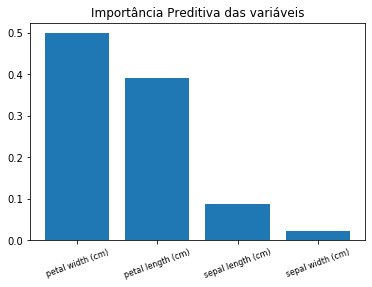

In [53]:
Calcula_Importancia()

## Análise de Correlação

In [54]:
# calcula a correlação entre as colunas/variáveis do dataframe
correlacao= df_Iris.corr().abs()

# Seleciona o triângulo superior da matriz de correlação
correlacao = correlacao.where(np.triu(np.ones(correlacao.shape), k=1).astype(np.bool))
correlacao

,Sepal Length,sepal width,petal length,petal width,target2
Sepal Length,NaN,0.11757,0.871754,0.817941,0.782561
sepal width,NaN,NaN,0.428440,0.366126,0.426658
petal length,NaN,NaN,NaN,0.962865,0.949035
petal width,NaN,NaN,NaN,NaN,0.956547
target2,NaN,NaN,NaN,NaN,NaN


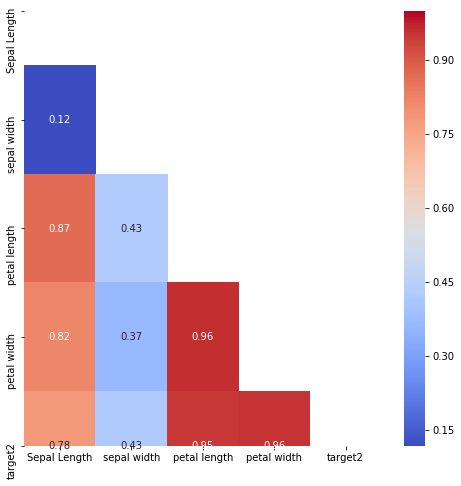

In [56]:
fig, ax = plt.subplots(figsize=(8, 8)) 
mask = np.zeros_like(df_Iris.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_Iris.corr().abs(), mask= mask, ax= ax, cmap='coolwarm', annot= True)

> Pela Análise de Correlação, vemos duas variáveis altamente correlacionadas com a variável-resposta, que são: 'Petal Width' e 'Petal Length', que são as duas variáveis mais importantes no dataframe. Lembram-se?
>> No entanto, confira a correlação entre 'Petal Width' e 'Petal Length'. Observou que a correlação entre elas é de 0.96? Estas variáveis são altamente correlacionadas...

### Usando SelectFromModel()

In [0]:
# A partir do Random Forest, seleciona features cuja importância seja maior que 0.15 e 0.45
sfm = SelectFromModel(clf, threshold=0.15)
sfm_2 = SelectFromModel(clf, threshold=0.45)

# Treina o seletor
sfm.fit(X_train, y_train)
sfm_2.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=50,
                                                 oob_score=False,
                                                 random_state=20111974,
         

In [0]:
# Mostra as duas features mais importantes para sfm
for feature_list_index in sfm.get_support(indices=True):
    print(l_Iris_labels[feature_list_index])

Petal Length
Petal Width


In [0]:
# Mostra as duas features mais importantes para sfm_2
for feature_list_index in sfm_2.get_support(indices=True):
    print(l_Iris_labels[feature_list_index])

Petal Width


Selecionando somente os atributos mais importantes:

In [0]:
# Constroi um dataset contendo somente as variáveis mais importantes
# Nota: Neste caso, estamos a aplicar a transformação tanto na base de treinamento quanto de validação
X_train_RFI= sfm.transform(X_train)
X_test_RFI= sfm.transform(X_test)

X_train_RFI_2= sfm_2.transform(X_train)
X_test_RFI_2= sfm_2.transform(X_test)

In [0]:
# Criar um classificador Random Forest somente com as features mais importantes
clf_RFI = RandomForestClassifier(n_estimators=10000, random_state= 20111974, n_jobs= 50)
clf_RFI_2 = RandomForestClassifier(n_estimators=10000, random_state= 20111974, n_jobs= 50)

# Treina o modelo com as features mais importantes
clf_RFI.fit(X_train_RFI, y_train)
clf_RFI_2.fit(X_train_RFI_2, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=50, oob_score=False, random_state=20111974,
                       verbose=0, warm_start=False)

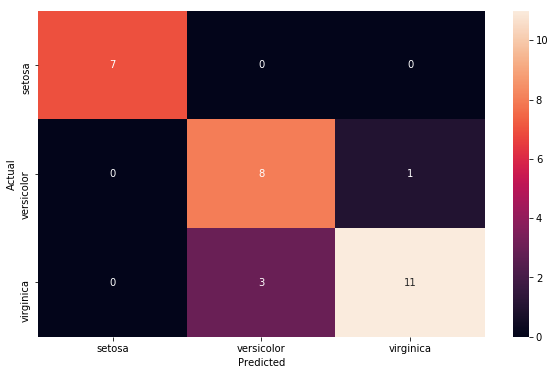

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm

# Aplica o Classificador no dataframe teste
y_pred = clf.predict(X_test)

# Verifica acurácia
accuracy_score(y_test, y_pred)

# Matriz de Confusão
from sklearn.metrics import confusion_matrix as cm
cm =cm(y_test, y_pred)  
index = ['setosa','versicolor','virginica']  
columns = ['setosa','versicolor','virginica']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
sns.heatmap(cm_df, annot=True)

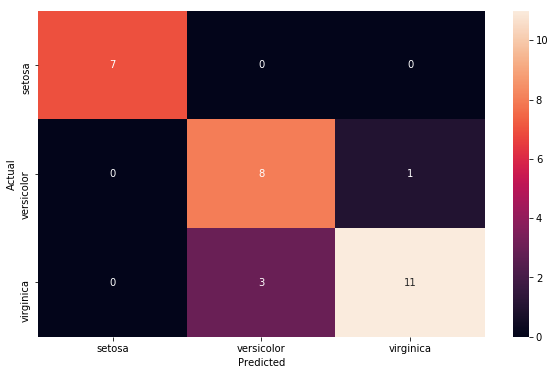

In [0]:
# Aplica o classificador na base de teste
y_pred_RFI = clf_RFI.predict(X_test_RFI)

# Avalia acurácia
accuracy_score(y_test, y_pred_RFI)

# Matriz de Confusão
from sklearn.metrics import confusion_matrix as cm
cm =cm(y_test, y_pred_RFI)  
index = ['setosa','versicolor','virginica']  
columns = ['setosa','versicolor','virginica']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
sns.heatmap(cm_df, annot=True)

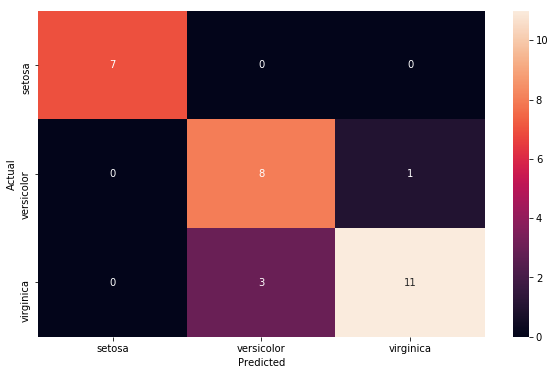

In [0]:
# Aplica o classificador na base de teste depois da análise de correlação
y_pred_RFI_2 = clf_RFI_2.predict(X_test_RFI_2)

# Avalia acurácia
accuracy_score(y_test, y_pred_RFI_2)

# Matriz de Confusão
from sklearn.metrics import confusion_matrix as cm
cm =cm(y_test, y_pred_RFI_2)  
index = ['setosa','versicolor','virginica']  
columns = ['setosa','versicolor','virginica']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
sns.heatmap(cm_df, annot=True)

> Como podemos ver
    * Modelo original (com 4 atributos) presenta acurácia de 93.3%;
    * Modelo reduzido (com 2 atributos) apresenta acurácia de 93%;
    * Modelo reduzido 2 (com 1 atributo) apresenta acurácia de 93%.

>> Ou seja, reduzimos o modelo de 4 para 1 atributo/variável e a acurária continua a mesma.

In [0]:
# Correlação dois a dois...
df_Iris[['petal length', 'petal width']].corr()

,petal length,petal width
petal length,1.000000,0.962865
petal width,0.962865,1.000000


## Feature Selection With XGBoost (Extreme Gradient Boosting)
> XGBoost, em geral, fornece melhores soluções do que outros algoritmos de Machine Learning.

In [0]:
!pip install xgboost

In [0]:
from xgboost import XGBClassifier

# Carregar as informações do dataframe Iris
Load_Iris_df()

In [0]:
# Cria um clasificador XGBoost
clf = XGBClassifier(n_estimators=10000, random_state= 20111974, n_jobs= 50, 
                    max_depth=5, learning_rate = 0.05)

# Treina o classificador
clf.fit(X_train, y_train)

# Calcula o y_pred e avalia a qualidade do ajuste
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy}")

Acurácia: 0.8666666666666667


In [0]:
# Adaptado de https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# Ajusta o ML usando cada importância calculada como threshold
thresholds = sorted(clf.feature_importances_)
for thresh in thresholds:
	# seleciona as features usando threshold
	selection = SelectFromModel(clf, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	
    # treina o ML
	selection_clf = XGBClassifier()
	selection_clf.fit(select_X_train, y_train)
	
    # Avalia o ML
	select_X_test = selection.transform(X_test)
	y_pred = selection_clf.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print(f"Threshold= {round(thresh,2)}, n= {select_X_train.shape[1]}, Acurácia: {round(accuracy*100.0,2)}")

Threshold= 0.009999999776482582, n= 4, Acurácia: 86.67
Threshold= 0.03999999910593033, n= 3, Acurácia: 86.67
Threshold= 0.44999998807907104, n= 2, Acurácia: 86.67
Threshold= 0.5, n= 1, Acurácia: 86.67


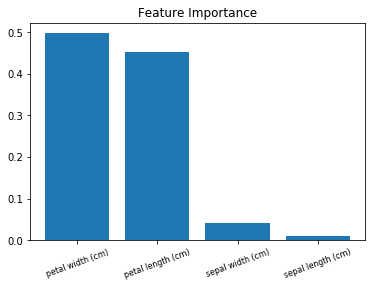

In [0]:
# Calcula a importância das features
importances = clf.feature_importances_

# Ordena as importâncias por ordem descendente
indices = np.argsort(importances)[::-1]

# Organiza...
names = [iris.feature_names[i] for i in indices]

# Barplot
plt.bar(range(X_train.shape[1]), importances[indices])

# Coloca o nome dos labels no eixo X
plt.xticks(range(X_train.shape[1]), names, rotation=20, fontsize = 8)

# Constroi o gráfico
plt.title("Feature Importance")

# Mostra o gráfico
plt.show()

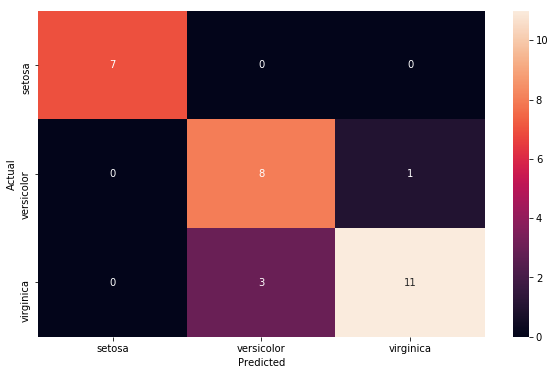

In [0]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix as cm
cm =cm(y_test, y_pred)  
index = ['setosa','versicolor','virginica']  
columns = ['setosa','versicolor','virginica']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
sns.heatmap(cm_df, annot=True)

## Feature Selection using PCA (Principal Components Analysis)

In [0]:
from sklearn.datasets import load_iris

# Carregar as informações do dataframe Iris
Load_Iris_df()

### Standardize the Data
* O PCA é afetado por escala, portanto, é necessário dimensionar as features/atributos antes de aplicar o PCA.
* Use o StandardScaler para padronizar os features/atributos usando com média = 0 e variância = 1.
* A propósito, esta é a principal transformação para muitos algoritmos de Machine Learning.

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Standardizing as features de X:

In [0]:
X_STD= StandardScaler().fit_transform(X)

In [0]:
pca_2c = PCA(n_components=2)
X_PCA_2c = pca_2c.fit_transform(X_STD)
df_PCA_2c = pd.DataFrame(data = X_PCA_2c, columns = ['PCA1', 'PCA2'])

Vamos entender o que está acontecendo:

Primeiramente, observe nosso array X abaixo. Cada coluna desse array representa uma coluna do dataframe df_Iris. Por exemplo, a primeira coluna são os dados da variável 'Sepal Length'. Identificou?

In [0]:
# Listando as primeiras 5 linhas de X
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Segundo, com a standardização, construimos o array X_STD, que mostramos abaixo:

In [0]:
X_STD[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

Veja abaixo a média e desvio-padrão do array X_STD:

In [0]:
np.mean(X_STD),np.std(X_STD)

(-1.4684549872375404e-15, 1.0)

Temos média 0 e desvio-padrão 1, certo? É isso que queríamos.

Por fim, a partir de X_STD, construimos o array X_PCA_2c, mostrado abaixo:

In [0]:
X_PCA_2c[0:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

Portanto, reduzimos (ou resumimos) o array X_STD de 5 dimensões para um array de 2 dimensões.

Finalmente, o dataframe final é mostrado abaixo:

In [0]:
df_PCA_final_2c= pd.concat([df_PCA_2c, df_Iris[['target']]], axis= 1)

In [0]:
df_PCA_final_2c.head()

,PCA1,PCA2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


### Visualizar reultados

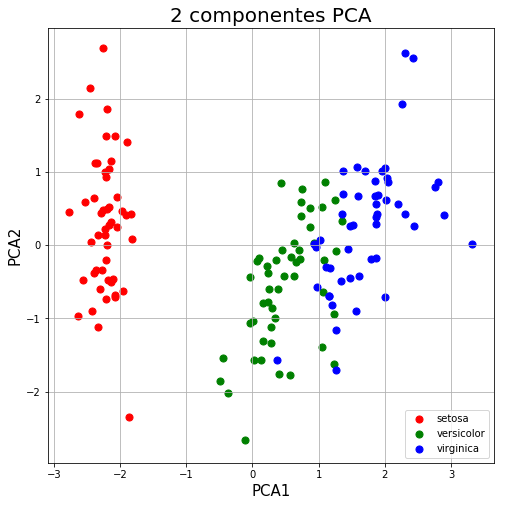

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_title('2 componentes PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_PCA_final_2c['target'] == target
    ax.scatter(df_PCA_final_2c.loc[indicesToKeep, 'PCA1']
               , df_PCA_final_2c.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

O que significa reduzir para 2 dimensões um array com 4 dimensões?

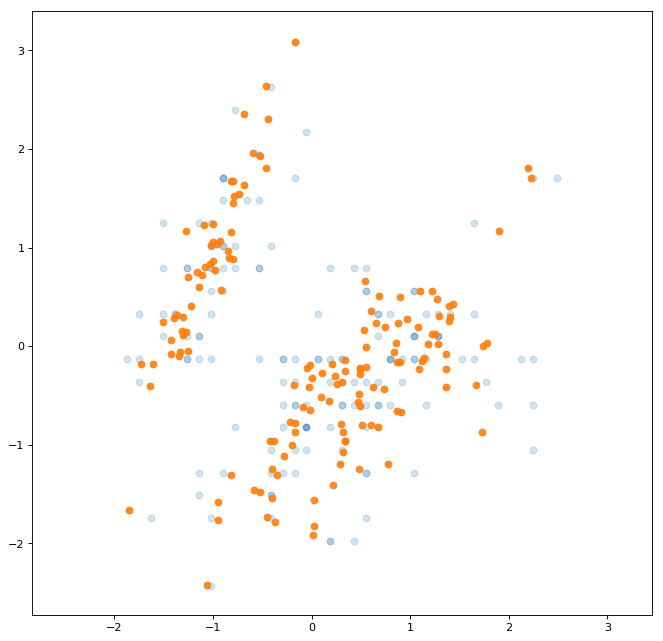

In [0]:
X_new = pca_2c.inverse_transform(X_PCA_2c)
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(X_STD[:, 0], X_STD[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.9)
plt.axis('equal');

### Análise de Correlação

In [0]:
# calcula a correlação entre as colunas/variáveis do dataframe
correlacao= df_Iris.corr().abs()

# Seleciona o triângulo superior da matriz de correlação
correlacao = correlacao.where(np.triu(np.ones(correlacao.shape), k=1).astype(np.bool))
correlacao

,Sepal Length,sepal width,petal length,petal width,target2
Sepal Length,NaN,0.11757,0.871754,0.817941,0.782561
sepal width,NaN,NaN,0.428440,0.366126,0.426658
petal length,NaN,NaN,NaN,0.962865,0.949035
petal width,NaN,NaN,NaN,NaN,0.956547
target2,NaN,NaN,NaN,NaN,NaN


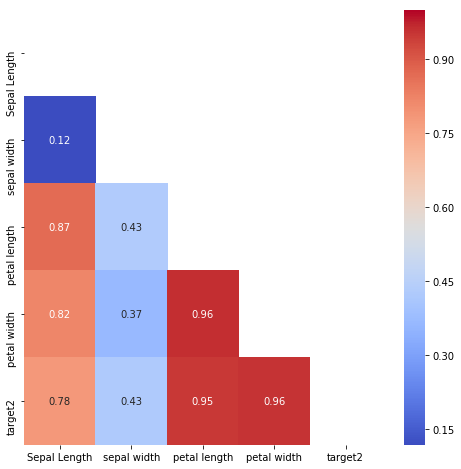

In [0]:
fig, ax = plt.subplots(figsize=(8, 8)) 
mask = np.zeros_like(df_Iris.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_Iris.corr().abs(), mask= mask, ax= ax, cmap='coolwarm', annot= True)

Pela Análise de Correlação, vemos duas variáveis altamente correlacionadas com a variável-resposta, que são: 'Peta Width' e 'Petal Length', que são as duas variáveis mais importantes no dataframe. Lembram-se?

### Variância explicada
* Como vimos, reduzimos um array de informações de 4 dimensões para um array com 2 dimensões. Com isso, perde-se alguma informação relativa à variância. Mas quanto perdemos?

* A Variância Explicada (ou Explained Variance, em inglês), mede o quanto de informação (variação) foi atribuída a cada um dos componentes principais. Usando o atributo explain_variance_ratio_, é possível ver que o primeiro componente principal contém 72,77% da variação e o segundo componente principal contém 23,03% da variação. Juntos, os dois componentes contêm 95,80% das informações. Portanto, perdemos quase nada em termos de informação e o modelo não é prejudicado por esta redução.


A resposta à essa pergunta é:

In [0]:
pca_2c.explained_variance_ratio_

array([0.72962445, 0.22850762])

Observe que o terceiro valor de pca_3c é muito baixo. Ou seja, baixa variabilidade explicada... Portanto, daqui já conseguimos ver que o número ideal de componentes são 2.

### Quantos componentes escolher

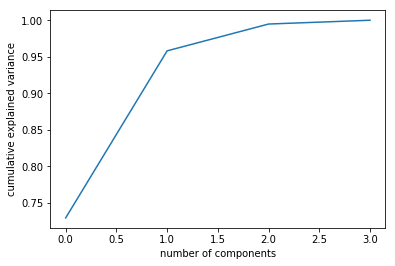

In [0]:
pca = PCA().fit(X_STD)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

**Interpretação**: Esta curva quantifica quanto da variância total de 4 dimensões está contida nos primeiros N componentes. Por exemplo, a primeira componente principal tem aproximadamente 95% da variação, enquanto que 2 componentes (os dois primeiros) explicam quase 100% da variabilidade. Portanto, em nosso caso, 2 componentes principais são suficientes para captar grande parte da variabilidade dos dados.

In [0]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

### Medindo o impacto

#### Treinar o modelo com X_PCA

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_PCA_2c, y, 
                                                    test_size=0.2, 
                                                    random_state= 20111974)

ValueError: ignored

In [0]:
# Optamos por 2 componentes principais
classifier_2c = RandomForestClassifier(max_depth=2, random_state=0)
classifier_2c.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Fazer as predições

In [0]:
y_pred_2c = classifier_2c.predict(X_test)

#### Medindo a performance

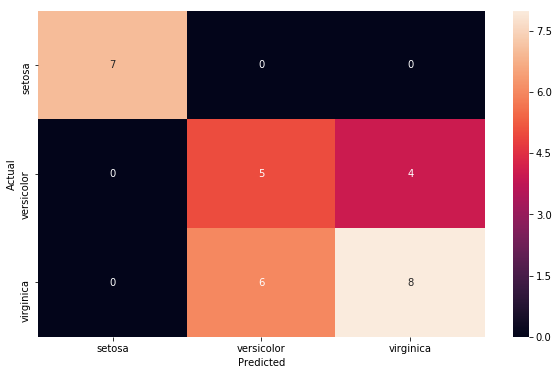

In [0]:
from sklearn.metrics import accuracy_score

# Matriz de Confusão
from sklearn.metrics import confusion_matrix as cm
cm_2c = cm(y_test, y_pred_2c)
index = ['setosa','versicolor','virginica']  
columns = ['setosa','versicolor','virginica']  
cm_2c_df = pd.DataFrame(cm_2c,columns,index)
plt.figure(figsize=(10,6))  
cm_2c_df.index.name = 'Actual'
cm_2c_df.columns.name = 'Predicted'
sns.heatmap(cm_2c_df, annot=True)

In [0]:
print('Accuracy (2 componentes)', accuracy_score(y_test, y_pred_2c))

Accuracy (2 componentes) 0.6666666666666666


### Comentários
> Se quisermos um PCA que retenha 99% da variância, usamos:
pca = PCA(n_components=0.99, whiten=True)

> Se quisermos saber quantos atributos foram selecionados para se obter os 99% da variância, use:
pca.n_components_



___
# **Exercícios**
> Por favor, formem equipes de até 4 alunos para resolver os exercícios abaixo.

* Para cada um dos dataframes a seguir, selecione os melhores atributos utilizando as seguintes técnicas técnicas:
    * Random Forest
    * XGBoost

## Exercício 1 - Breast Cancer

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X= cancer['data']
y= cancer['target']

df_cancer = pd.DataFrame(np.c_[X, y], columns= np.append(cancer['feature_names'], ['target']))
df_cancer['target'] = df_cancer['target'].map({0: 'malign', 1: 'benign'})
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malign


## Exercício 2 - Fraud Detection

In [0]:
import pandas as pd
import numpy as np

url= 'https://raw.githubusercontent.com/MathMachado/Python_RFB/DS_Python/Dataframes/creditcard.csv?token=AGDJQ63IAZCFP7GTSZTOMAK5QBSP6'
df_CC= pd.read_csv(url)
df_CC.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## Exercício 3 - Boston Housing Price

In [0]:
from sklearn.datasets import load_boston

boston = load_boston()
X= boston['data']
y= boston['target']

df_boston = pd.DataFrame(np.c_[X, y], columns= np.append(boston['feature_names'], ['target']))
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Exercício 4 - Diabetes


In [0]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X= diabetes['data']
y= diabetes['target']

df_diabetes = pd.DataFrame(np.c_[X, y], columns= np.append(diabetes['feature_names'], ['target']))
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Exercício 5 - Crimes

In [0]:
url= 'https://raw.githubusercontent.com/MathMachado/Python_RFB/DS_Python/Dataframes/Crime.txt?token=AGDJQ665WUIWIEKDPK6WO625P3QUQ'
df_Crime = pd.read_table(url, sep=',', na_values='?')
df_Crime.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


(2215, 147)

In [0]:
df_Crime.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,...,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2780.9,4.37,NaN,NaN,NaN,NaN,0.0,NaN,3,8.3,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451.0,4391,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2,3217.7,3.31,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,10.0,57.86,10.0,57.86,33.0,190.93,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,0,0.0,17390,69.33,0.55,42.82,32.16,11.21,14.43,24018,8483,9009,887,4425,3352,3000.0,1328,2855,29.99,12.15,23.06,25.28,9.08,52.44,6.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.5,974.2,0.38,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,NaN,NaN,4.0,32.04,14.0,112.14,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79
